In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import sys
import os
sys.path.insert(0, 'C:/Users/User/Desktop/Week-3/scripts')

from data_analysis import (load_data, print_data_types, print_descriptive_statistics, print_additional_variability_measures,
    print_data_summary,print_numerical_descriptive_statistics,convert_to_numeric, handle_categorical_data, impute_numerical_data, 
    convert_categorical,convert_dates,drop_columns_with_missing_data, plot_numerical_distributions, 
    plot_categorical_distributions, plot_totalpremium_vs_totalclaims, 
    plot_correlation_matrix, plot_cover_type_by_province,
    plot_totalpremium_by_province_and_covercategory,
    plot_vehicles_by_province_and_make,
    plot_total_premium_trends,
    plot_numerical_boxplots,
    plot_violin_distribution,
    plot_scatter_with_regression,
    plot_boxplot_by_category
)

data = pd.read_csv('C:/Users/User/Desktop/10/MachineLearningRating_v3/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)

print("\nData Types of Each Column:")
print(data.dtypes)



Data Types of Each Column:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object


In [13]:
print(data['LegalType'].value_counts())

Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: LegalType, dtype: int64


In [17]:

# Print the data types of each column
print_data_types(data)

# Print descriptive statistics for numerical features
print_descriptive_statistics(data)

# Define numerical features for additional variability measures
numerical_features = ['TotalPremium', 'TotalClaims']

# Print additional variability measures
print_additional_variability_measures(data, numerical_features)



Data Types of Each Column:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object


In [15]:
# Print a summary of the data
print_data_summary(data)

# Define numerical features for descriptive statistics
numerical_features = ['TotalPremium', 'TotalClaims']

# Print descriptive statistics and variability
print_numerical_descriptive_statistics(data, numerical_features)


Data Summary:
        UnderwrittenCoverID      PolicyID     TransactionMonth  \
count          1.000098e+06  1.000098e+06              1000098   
unique                  NaN           NaN                   23   
top                     NaN           NaN  2015-08-01 00:00:00   
freq                    NaN           NaN               106747   
mean           1.048175e+05  7.956682e+03                  NaN   
std            6.329371e+04  5.290039e+03                  NaN   
min            1.000000e+00  1.400000e+01                  NaN   
25%            5.514300e+04  4.500000e+03                  NaN   
50%            9.408300e+04  7.071000e+03                  NaN   
75%            1.391900e+05  1.107700e+04                  NaN   
max            3.011750e+05  2.324600e+04                  NaN   

       IsVATRegistered Citizenship   LegalType    Title Language  \
count          1000098     1000098     1000098  1000098  1000098   
unique               2           4           6        5 

In [18]:

# Convert date columns
date_columns = {
    'VehicleIntroDate': None,
    'TransactionMonth': '%Y-%m'
}
data = convert_dates(data, date_columns)

# Convert categorical columns
categorical_features = [
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'VehicleType', 'bodytype', 'AlarmImmobiliser',
    'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
    'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory',
    'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]
data = convert_categorical(data, categorical_features)

# Print a summary of the data
print_data_summary(data)

# Define numerical features for descriptive statistics
numerical_features = ['TotalPremium', 'TotalClaims']

# Print descriptive statistics and variability
print_numerical_descriptive_statistics(data, numerical_features)



Data Summary:


C:\Users/User/Desktop/Week-3/scripts\data_analysis.py:35: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include='all'))
C:\Users/User/Desktop/Week-3/scripts\data_analysis.py:35: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include='all'))


        UnderwrittenCoverID      PolicyID     TransactionMonth  \
count          1.000098e+06  1.000098e+06              1000098   
unique                  NaN           NaN                   23   
top                     NaN           NaN  2015-08-01 00:00:00   
freq                    NaN           NaN               106747   
first                   NaN           NaN  2013-10-01 00:00:00   
last                    NaN           NaN  2015-08-01 00:00:00   
mean           1.048175e+05  7.956682e+03                  NaN   
std            6.329371e+04  5.290039e+03                  NaN   
min            1.000000e+00  1.400000e+01                  NaN   
25%            5.514300e+04  4.500000e+03                  NaN   
50%            9.408300e+04  7.071000e+03                  NaN   
75%            1.391900e+05  1.107700e+04                  NaN   
max            3.011750e+05  2.324600e+04                  NaN   

       IsVATRegistered Citizenship   LegalType    Title Language  \
count  

<font size="32"><b>Handling Missing Values</b></font>

In [19]:
print(data.isnull().sum())


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                          40232
AccountType                   40232
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [20]:
# Define feature lists
numerical_features = ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
                      'CustomValueEstimate', 'CapitalOutstanding']

categorical_features = ['Bank', 'AccountType', 'VehicleType', 'make', 'Model', 'bodytype', 
                        'VehicleIntroDate', 'NewVehicle', 'WrittenOff', 'Rebuilt', 
                        'Converted', 'CrossBorder']
columns_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder']

# Convert columns to numeric
data = convert_to_numeric(data, numerical_features)

# Handle missing values in categorical columns
data = handle_categorical_data(data, categorical_features)

# Impute missing values for numerical columns
data = impute_numerical_data(data, numerical_features)

# Drop columns with high or all missing values
data = drop_columns_with_missing_data(data, columns_to_drop)

# Verify missing values after imputation
print("\nMissing Data After Imputation:")
print(data.isnull().sum())



Missing Data After Imputation:
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalO

<font size="32"><b>Univariate Analysis</b></font>

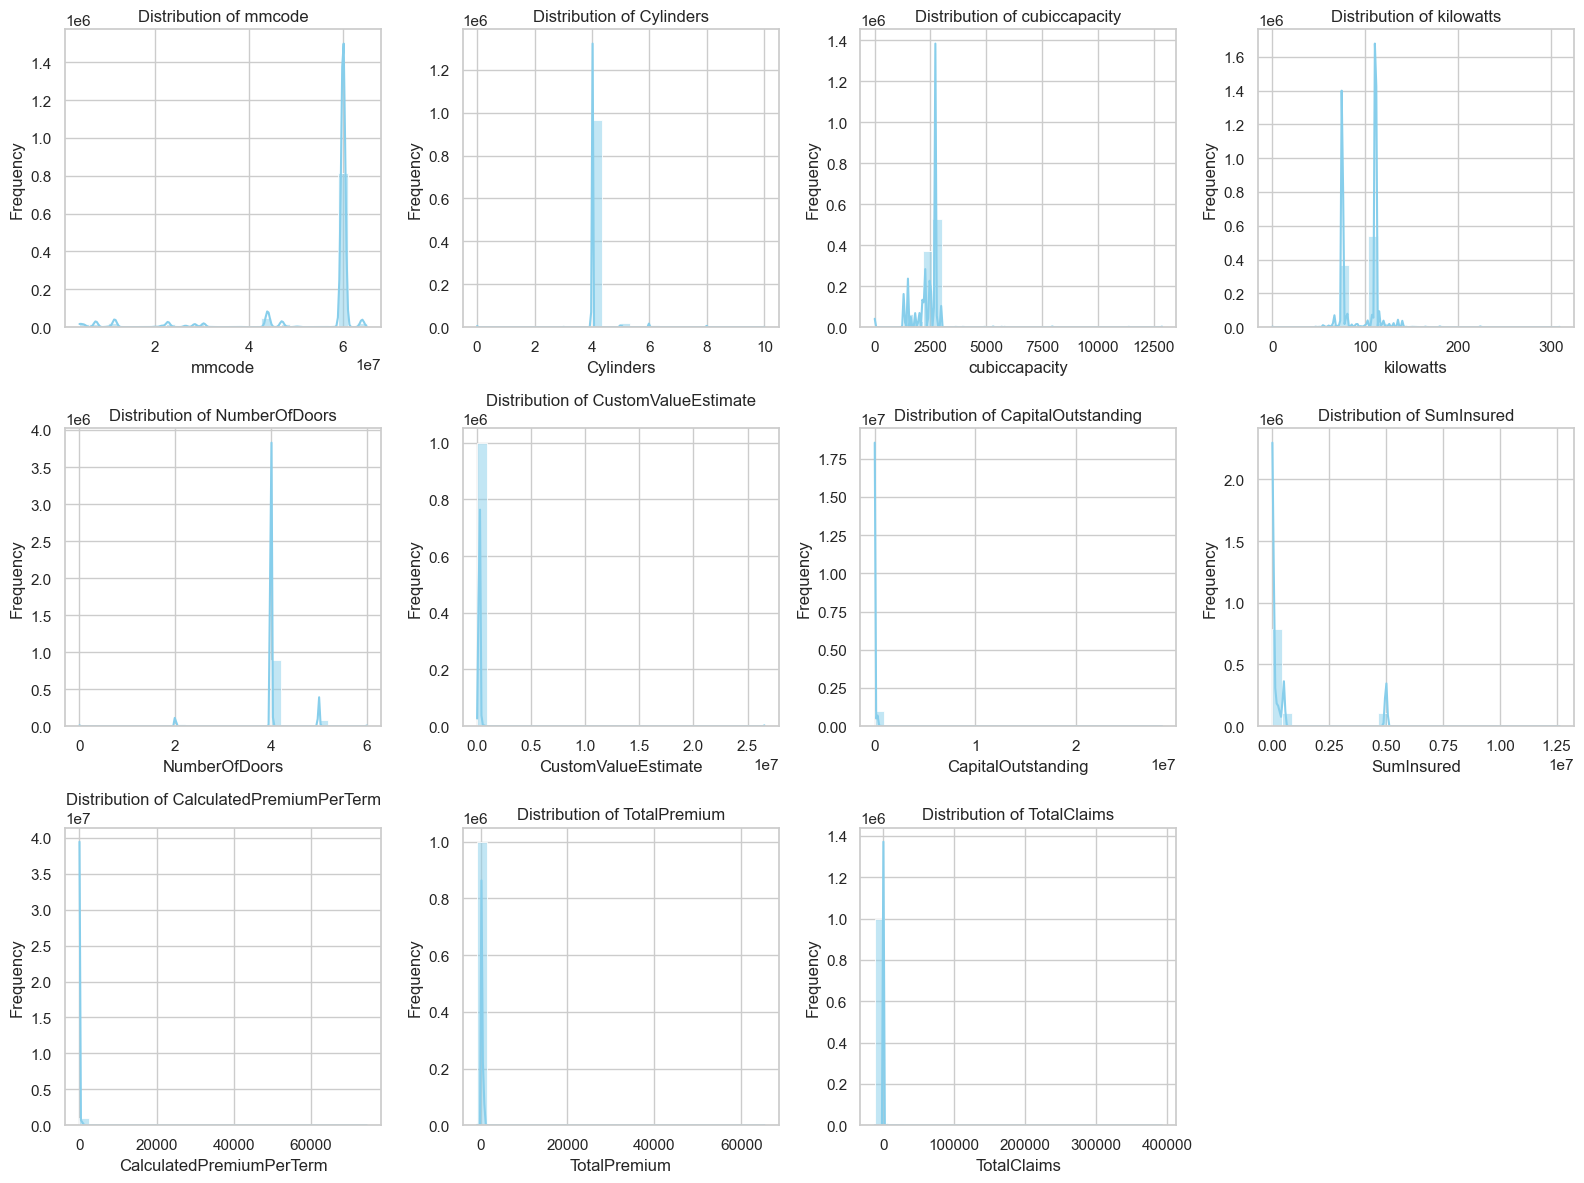

In [21]:
# Define numerical features
numerical_features = [
    'mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
    'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured', 
    'CalculatedPremiumPerTerm', 'ExcessSelected', 'TotalPremium', 'TotalClaims'
]
# Plot histograms with KDE for numerical columns
plot_numerical_distributions(data, numerical_features)


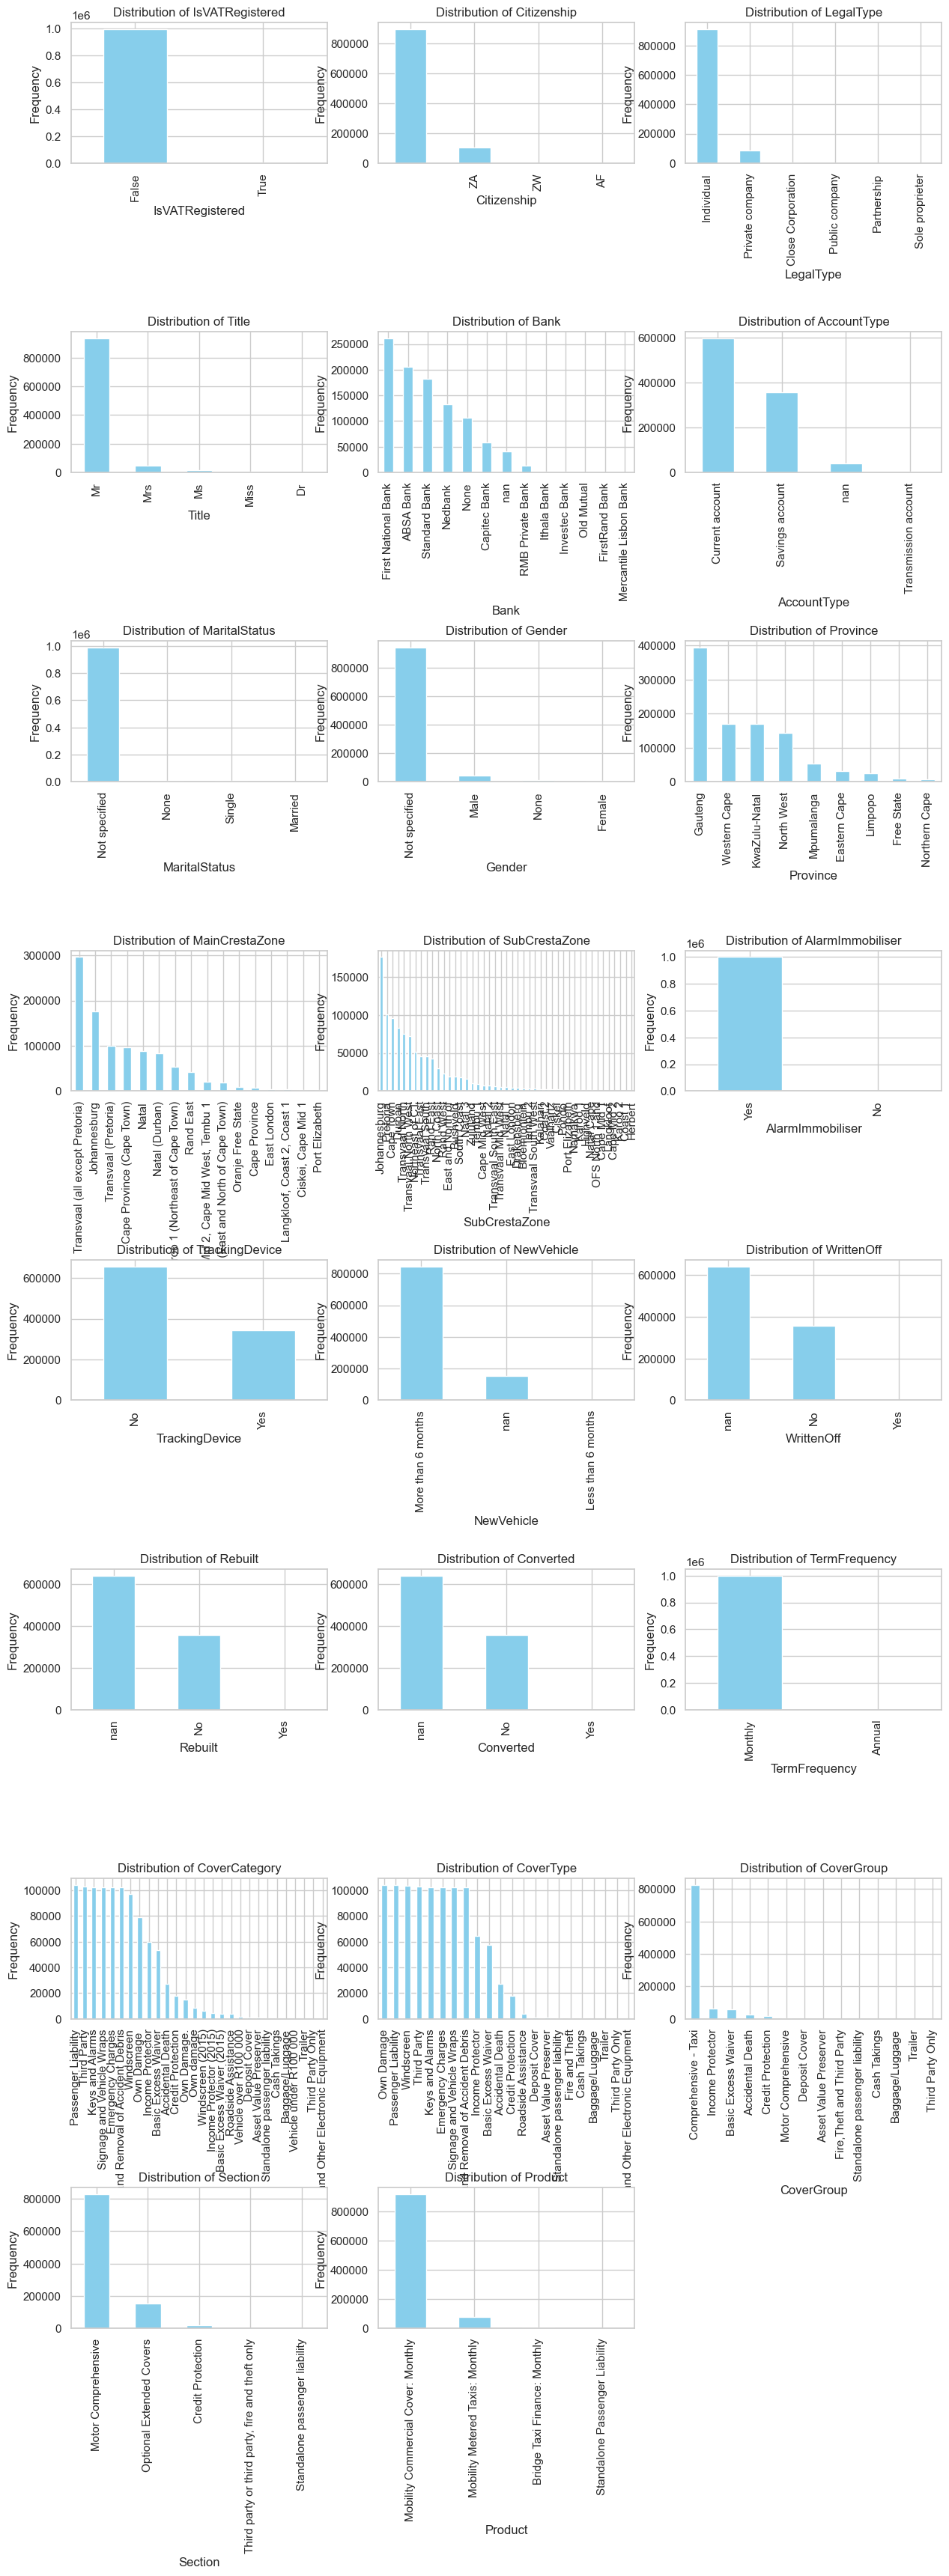

In [22]:
categorical_features = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank', 
    'AccountType', 'MaritalStatus', 'Gender', 'Province', 'MainCrestaZone', 
    'SubCrestaZone', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 
    'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency', 'CoverCategory', 
    'CoverType', 'CoverGroup', 'Section', 'Product'
]
# Plot bar charts for categorical distributions
plot_categorical_distributions(data, categorical_features)

<font size="32"><b>Bivariate or Multivariate Analysis</b></font>

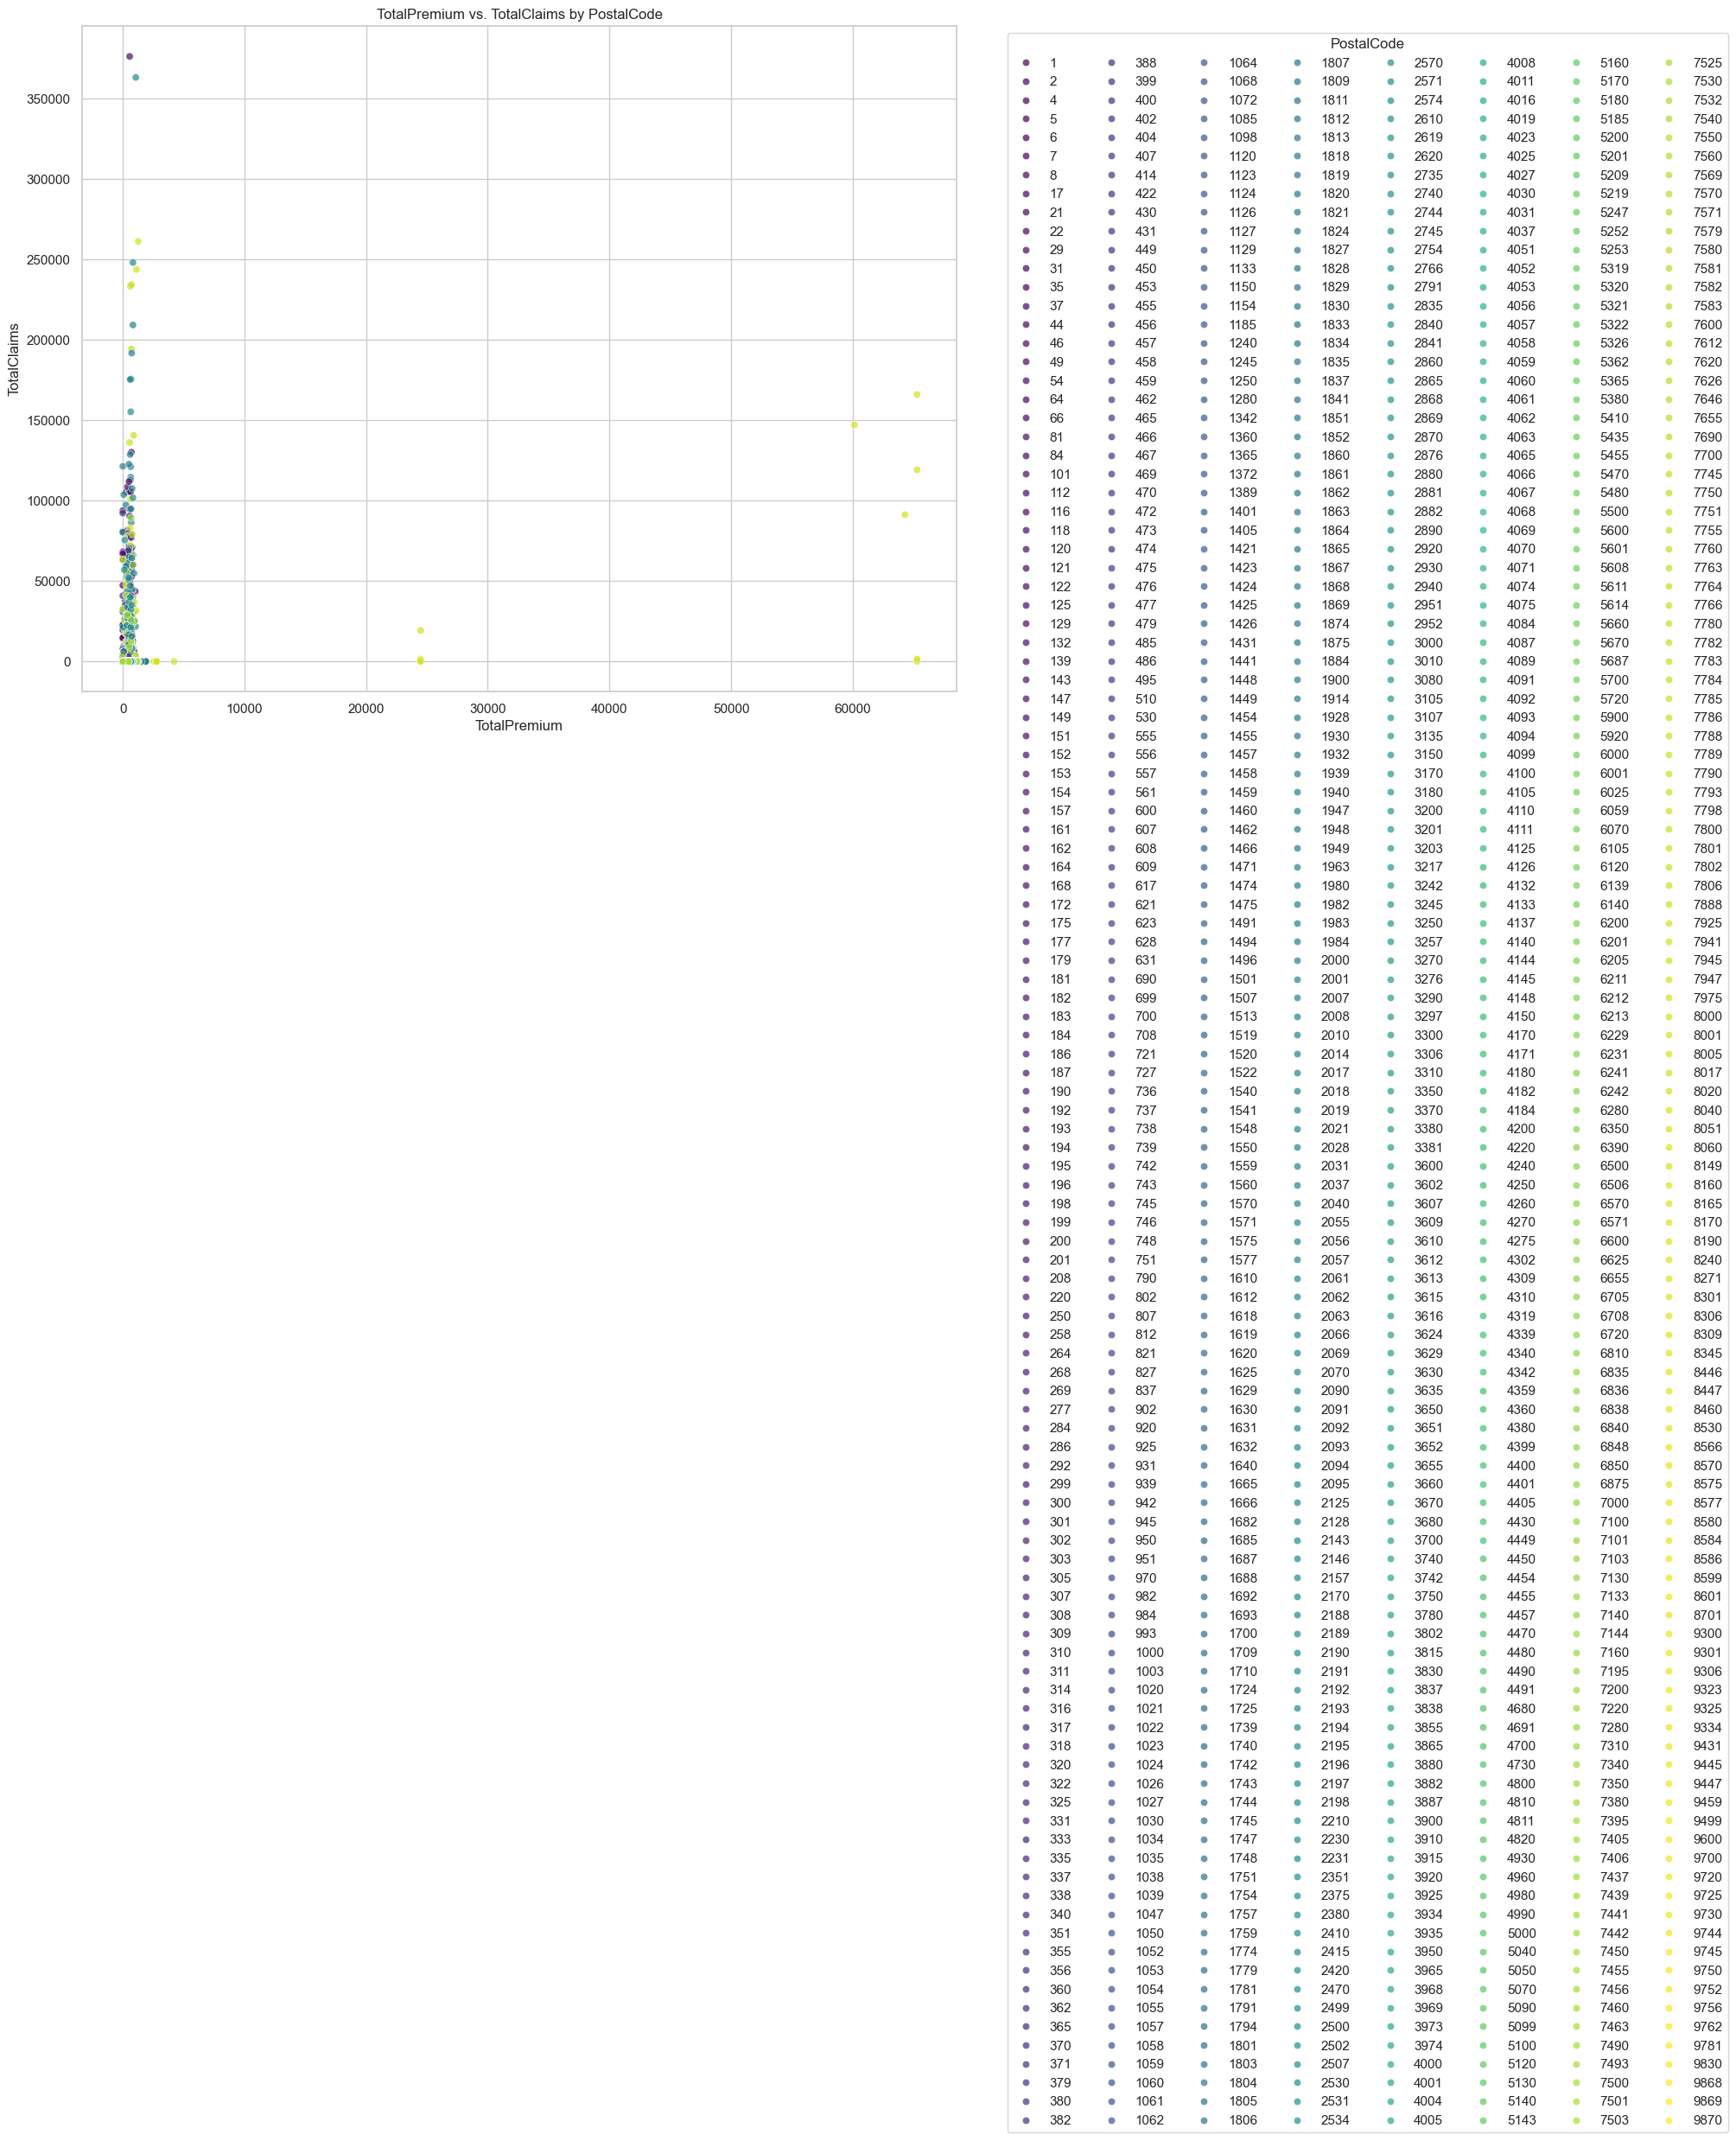

In [31]:

# Plot TotalPremium vs. TotalClaims by PostalCode
plot_totalpremium_vs_totalclaims(data)

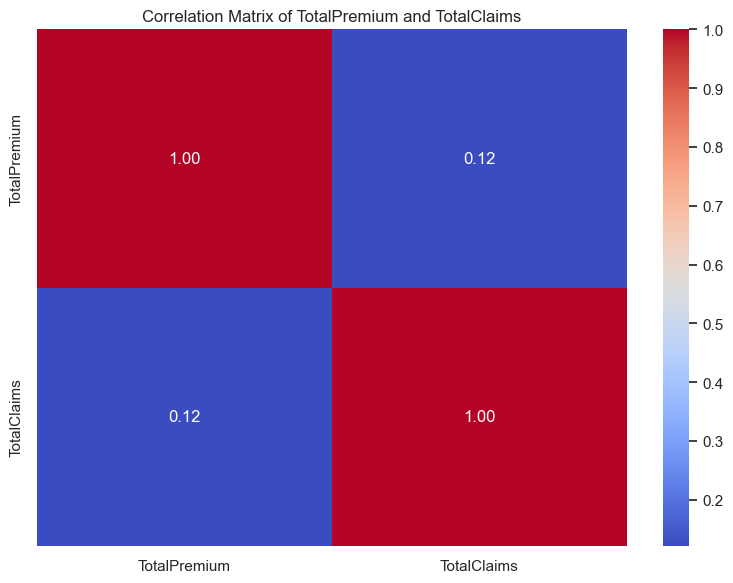

In [24]:
# Plot correlation matrix of TotalPremium and TotalClaims
plot_correlation_matrix(data)

<font size ="32"><b>Data Comparison</b></font>

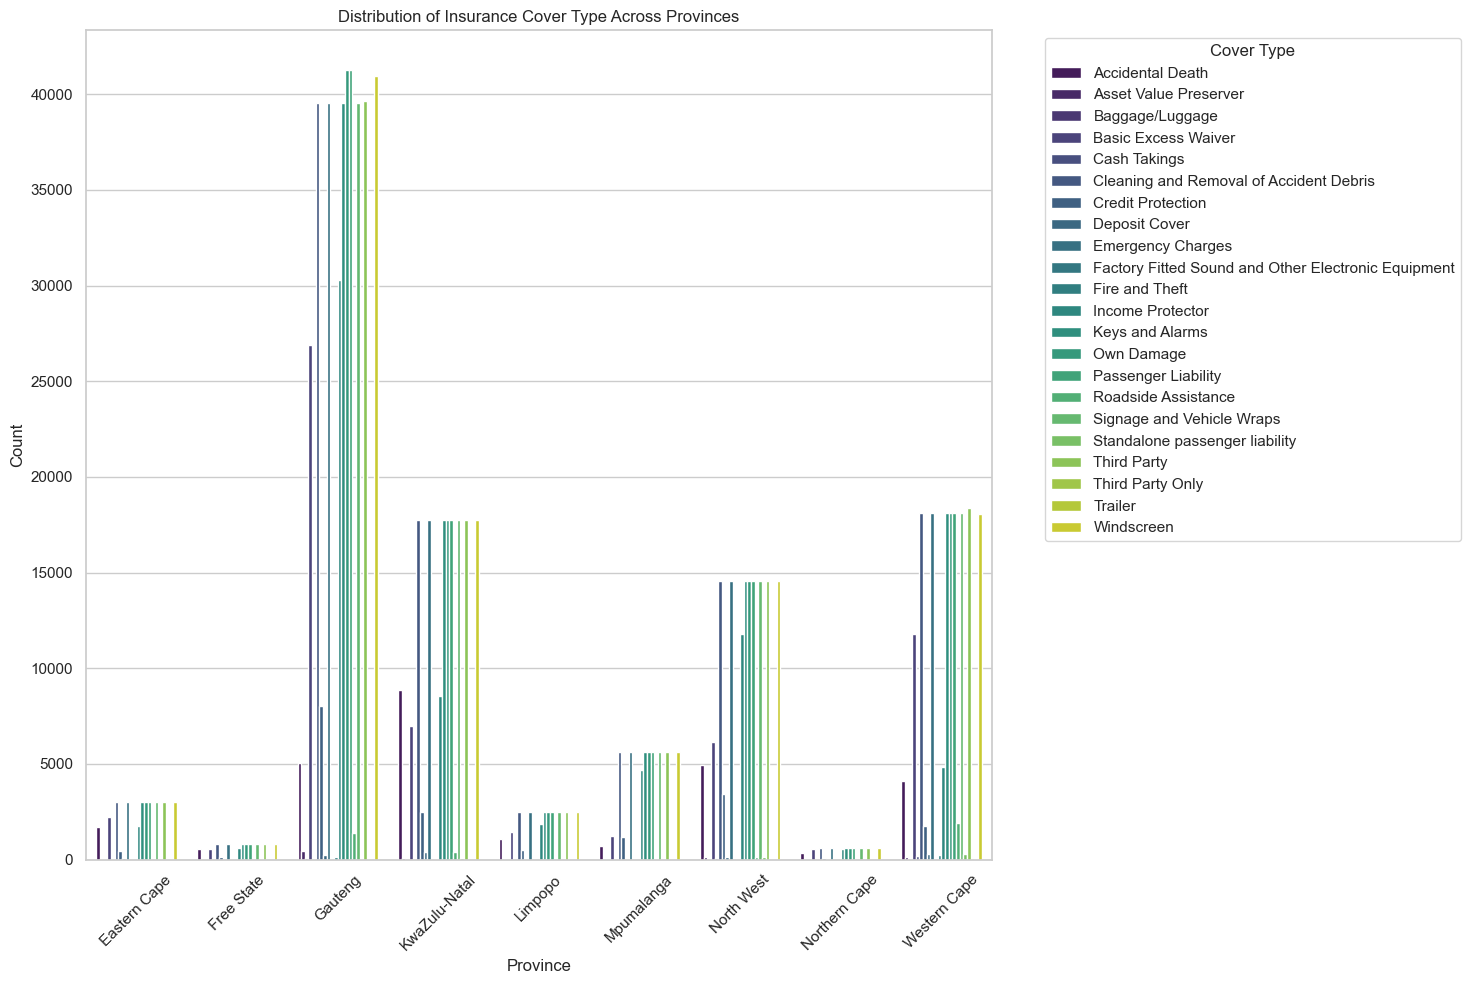

In [25]:
# Plot distribution of insurance cover type across provinces
plot_cover_type_by_province(data)

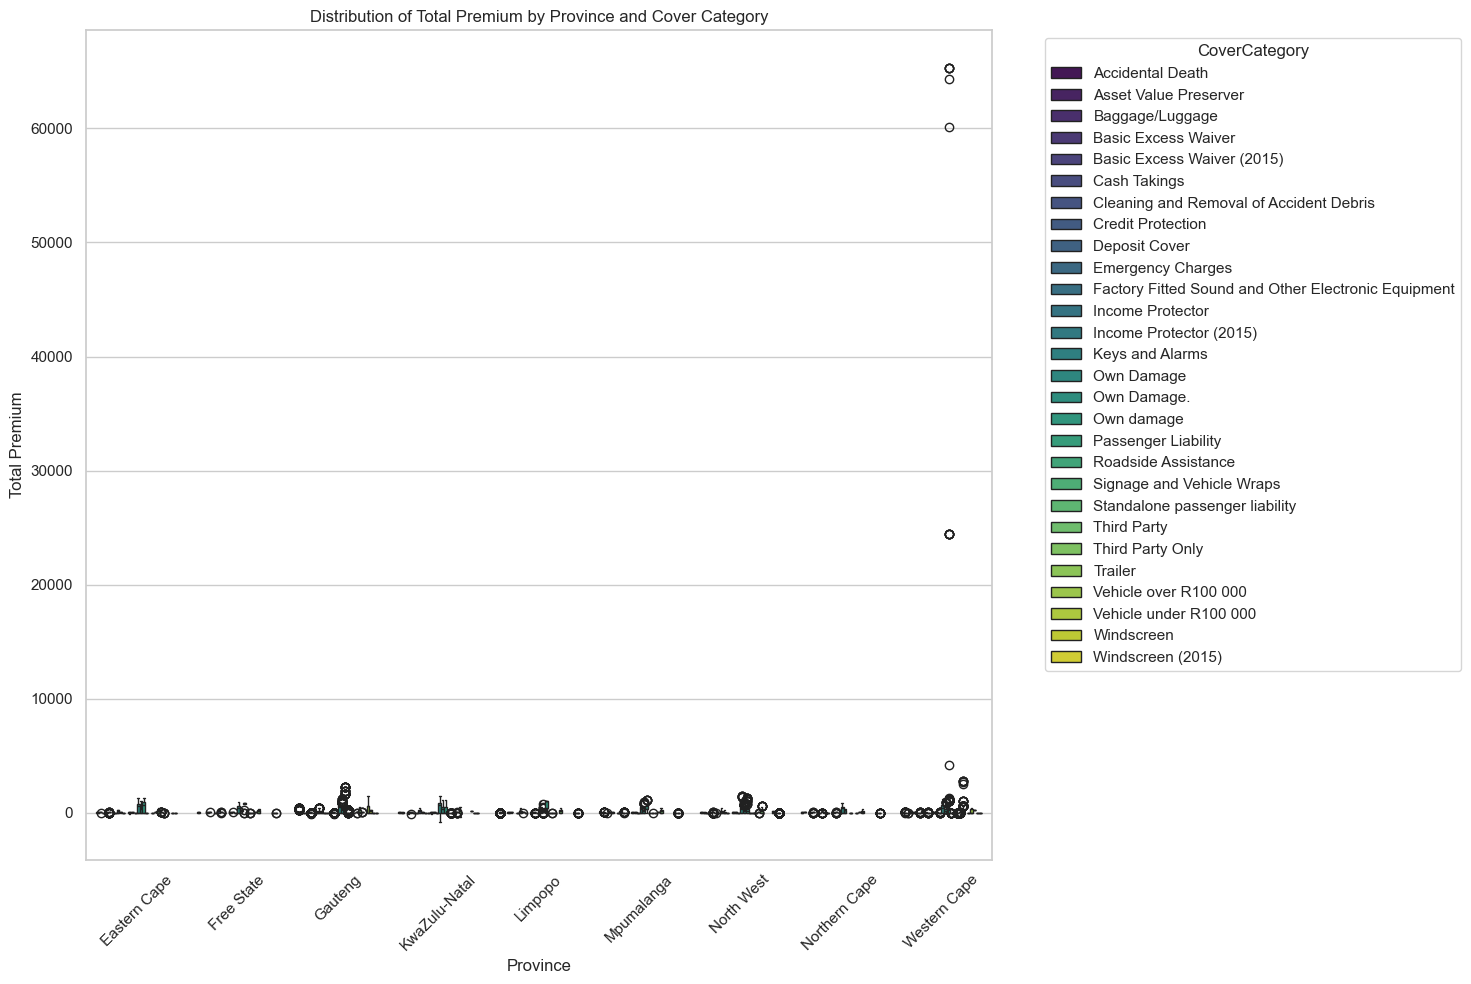

In [26]:
# Plot distribution of Total Premium by Province and Cover Category
plot_totalpremium_by_province_and_covercategory(data)

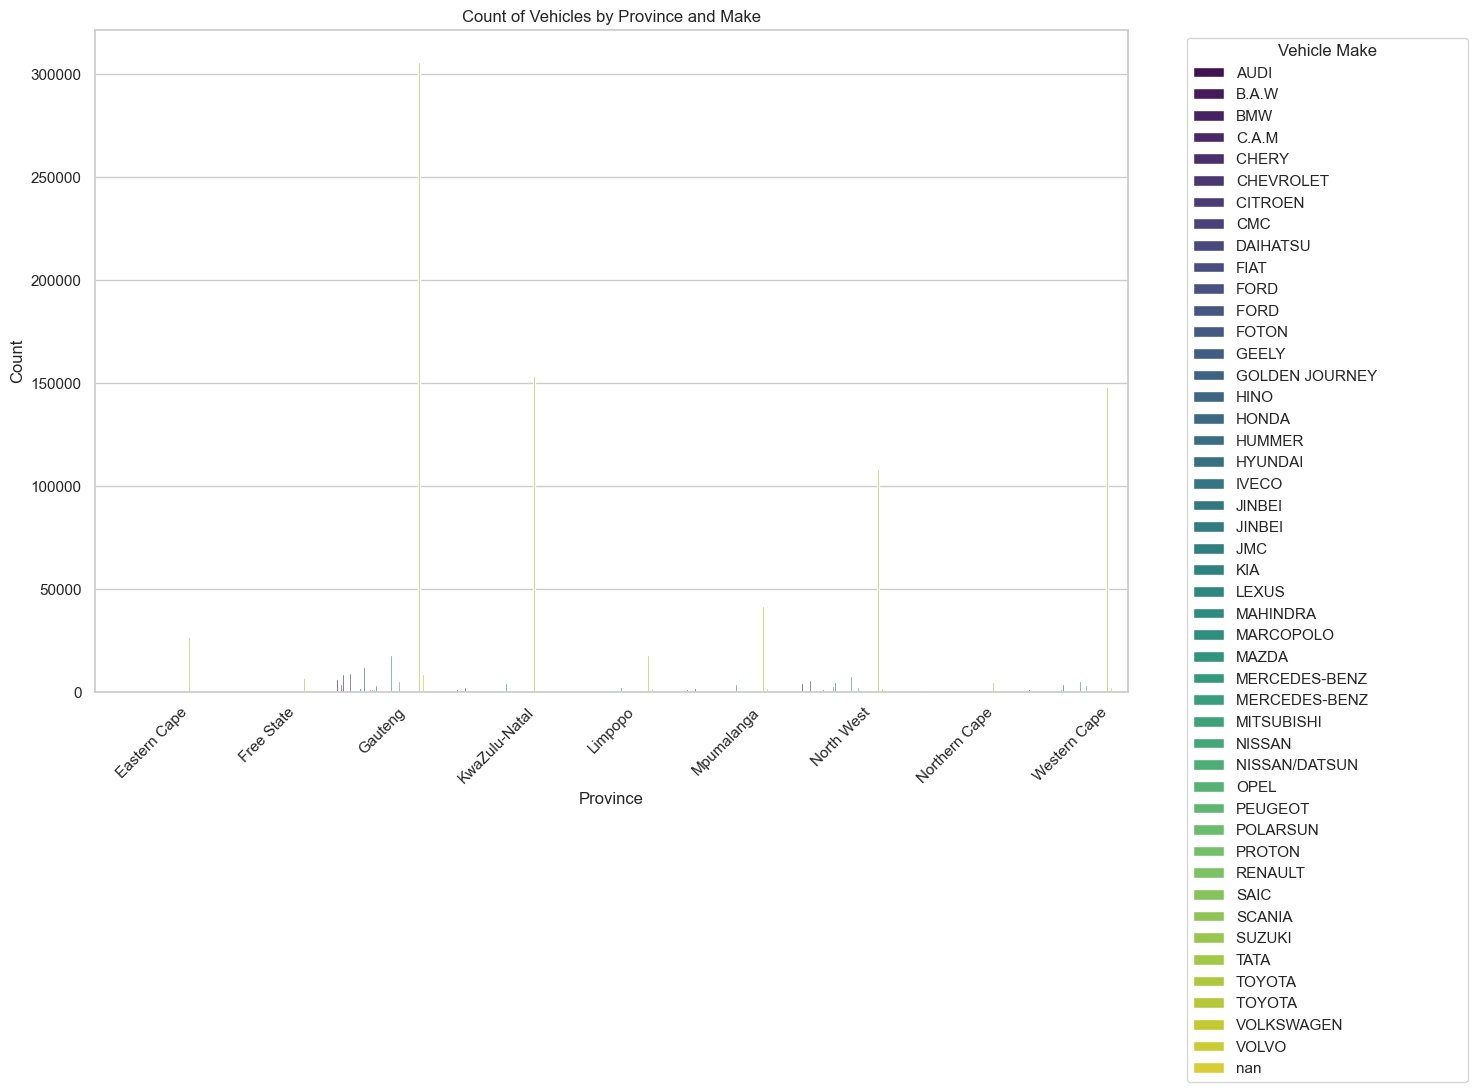

In [27]:
# Plot count of vehicles by Province and Make
plot_vehicles_by_province_and_make(data)

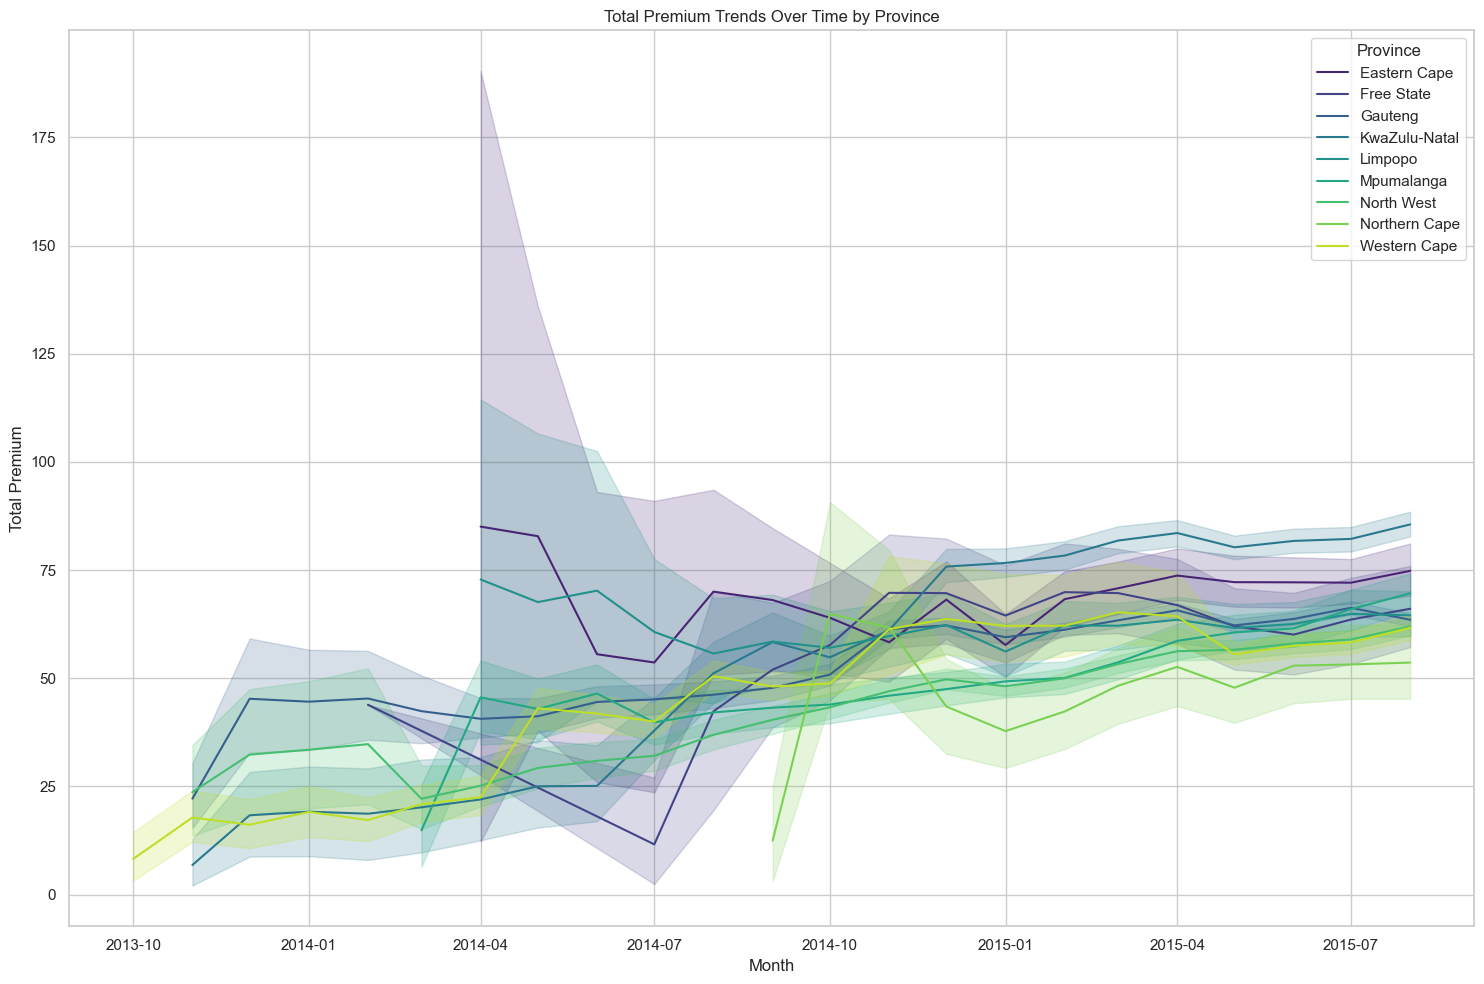

In [28]:
# Plot Total Premium trends over time by Province
plot_total_premium_trends(data)

<font size="16"><b>Outlier Detection</b></font>

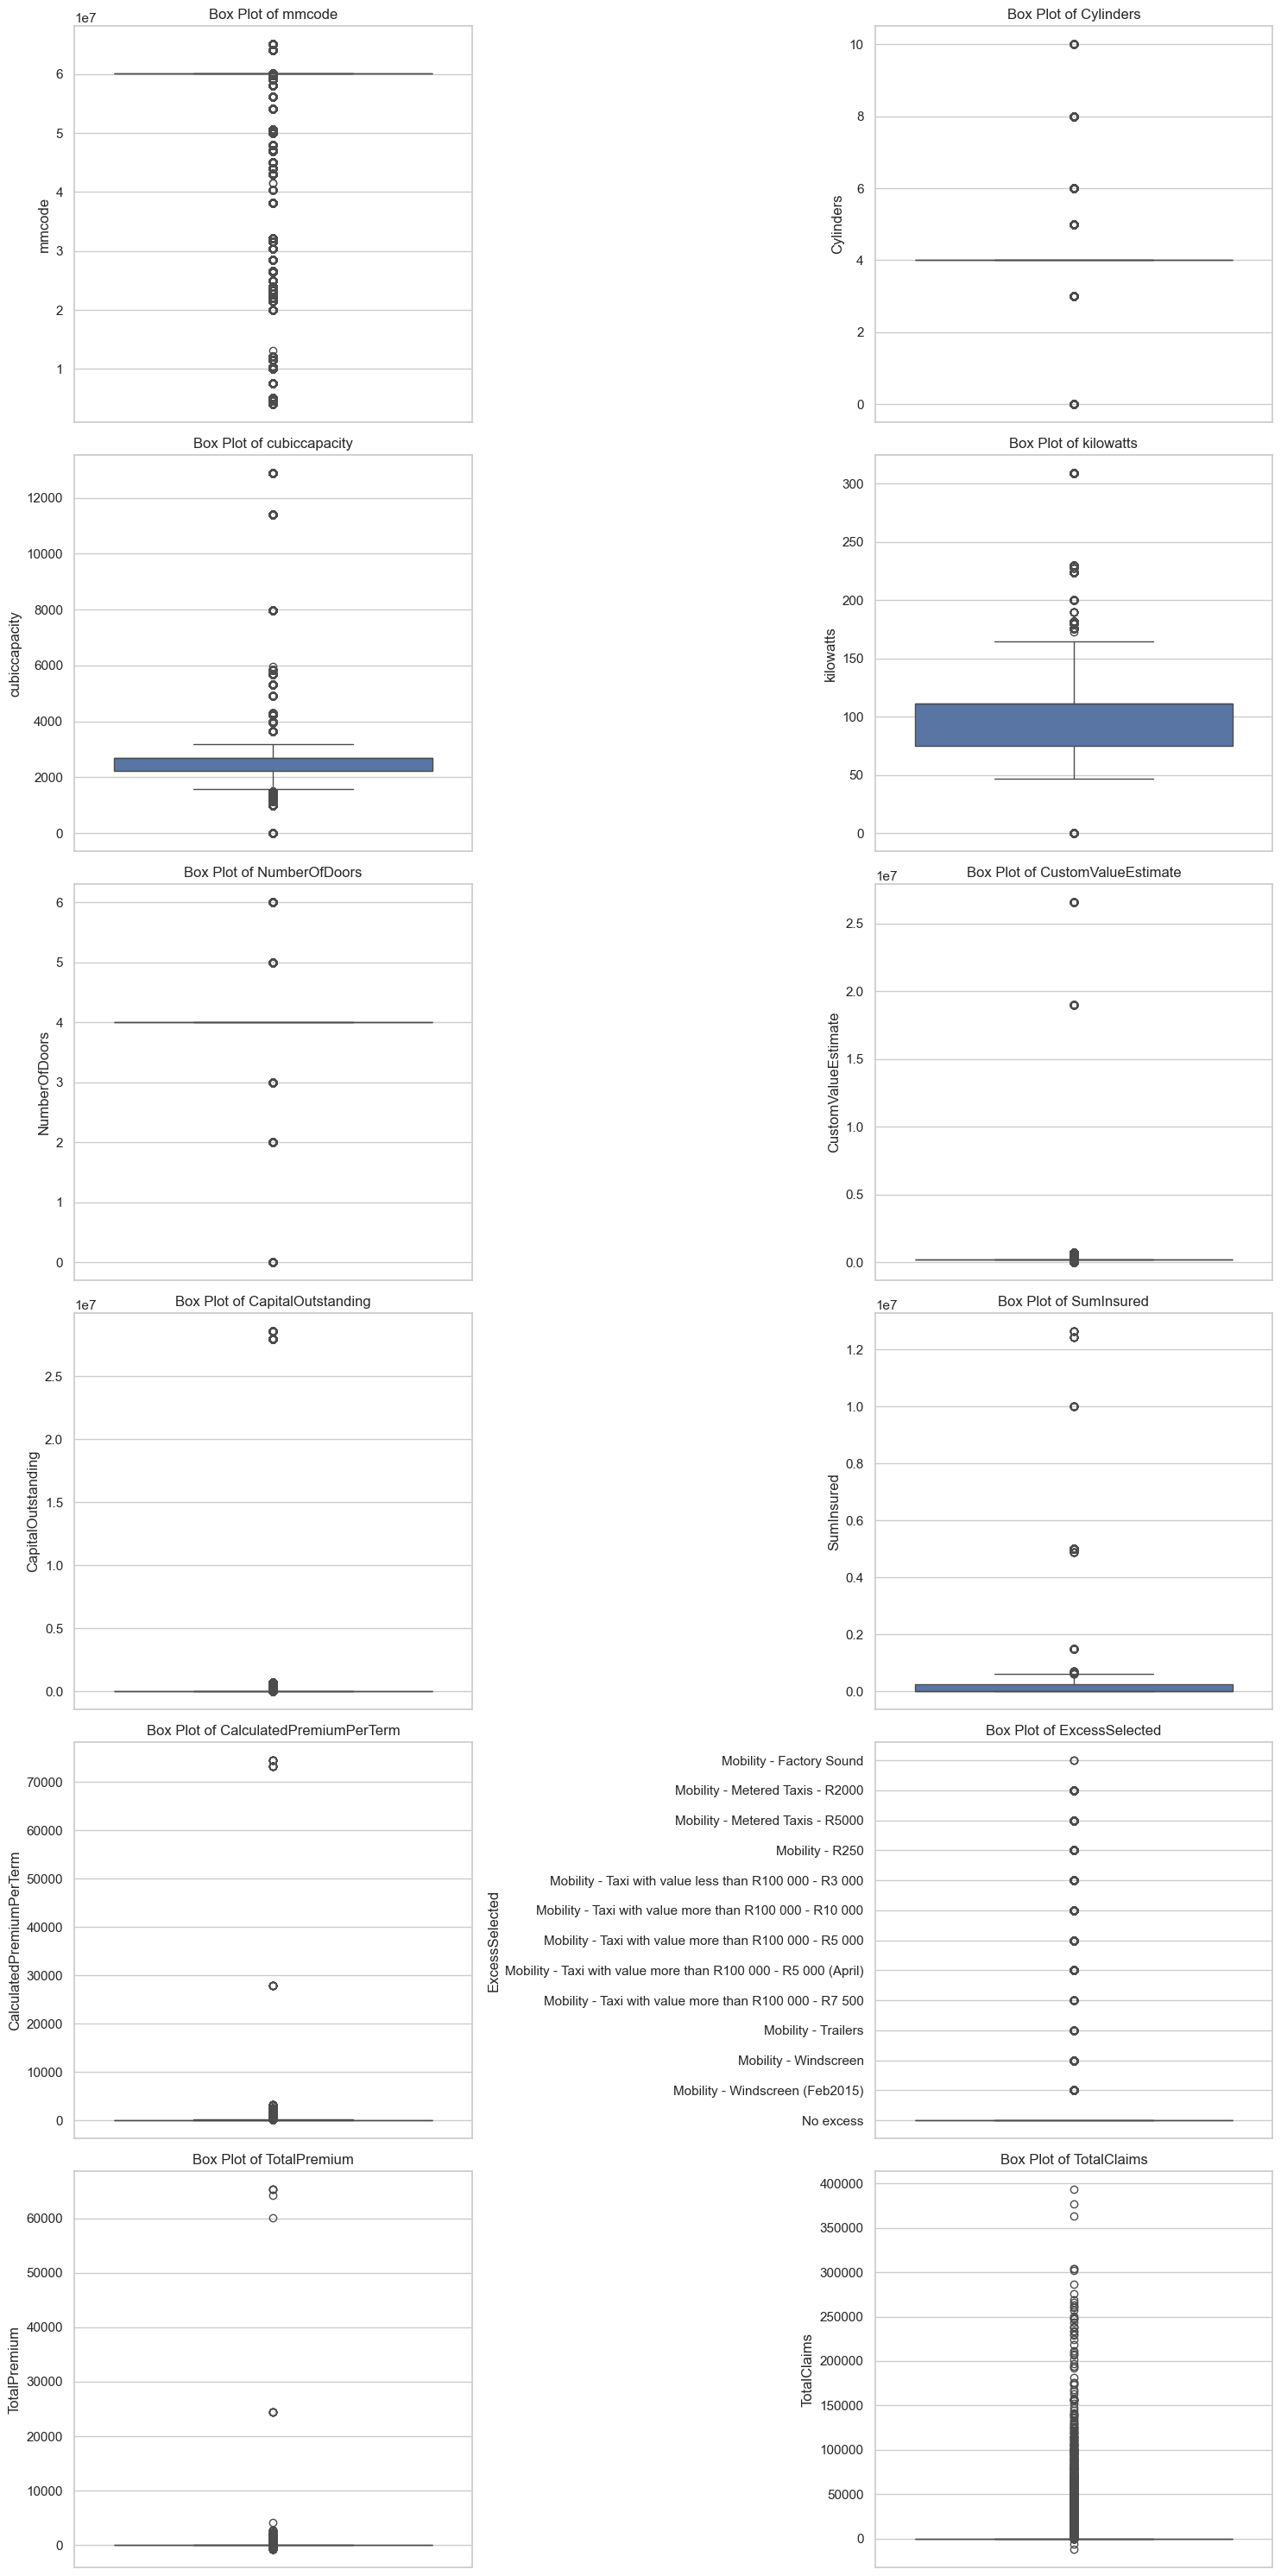

In [29]:
# Plot box plots for numerical columns
plot_numerical_boxplots(data, numerical_features)

<font size="16"><b>Visualization</b></font>

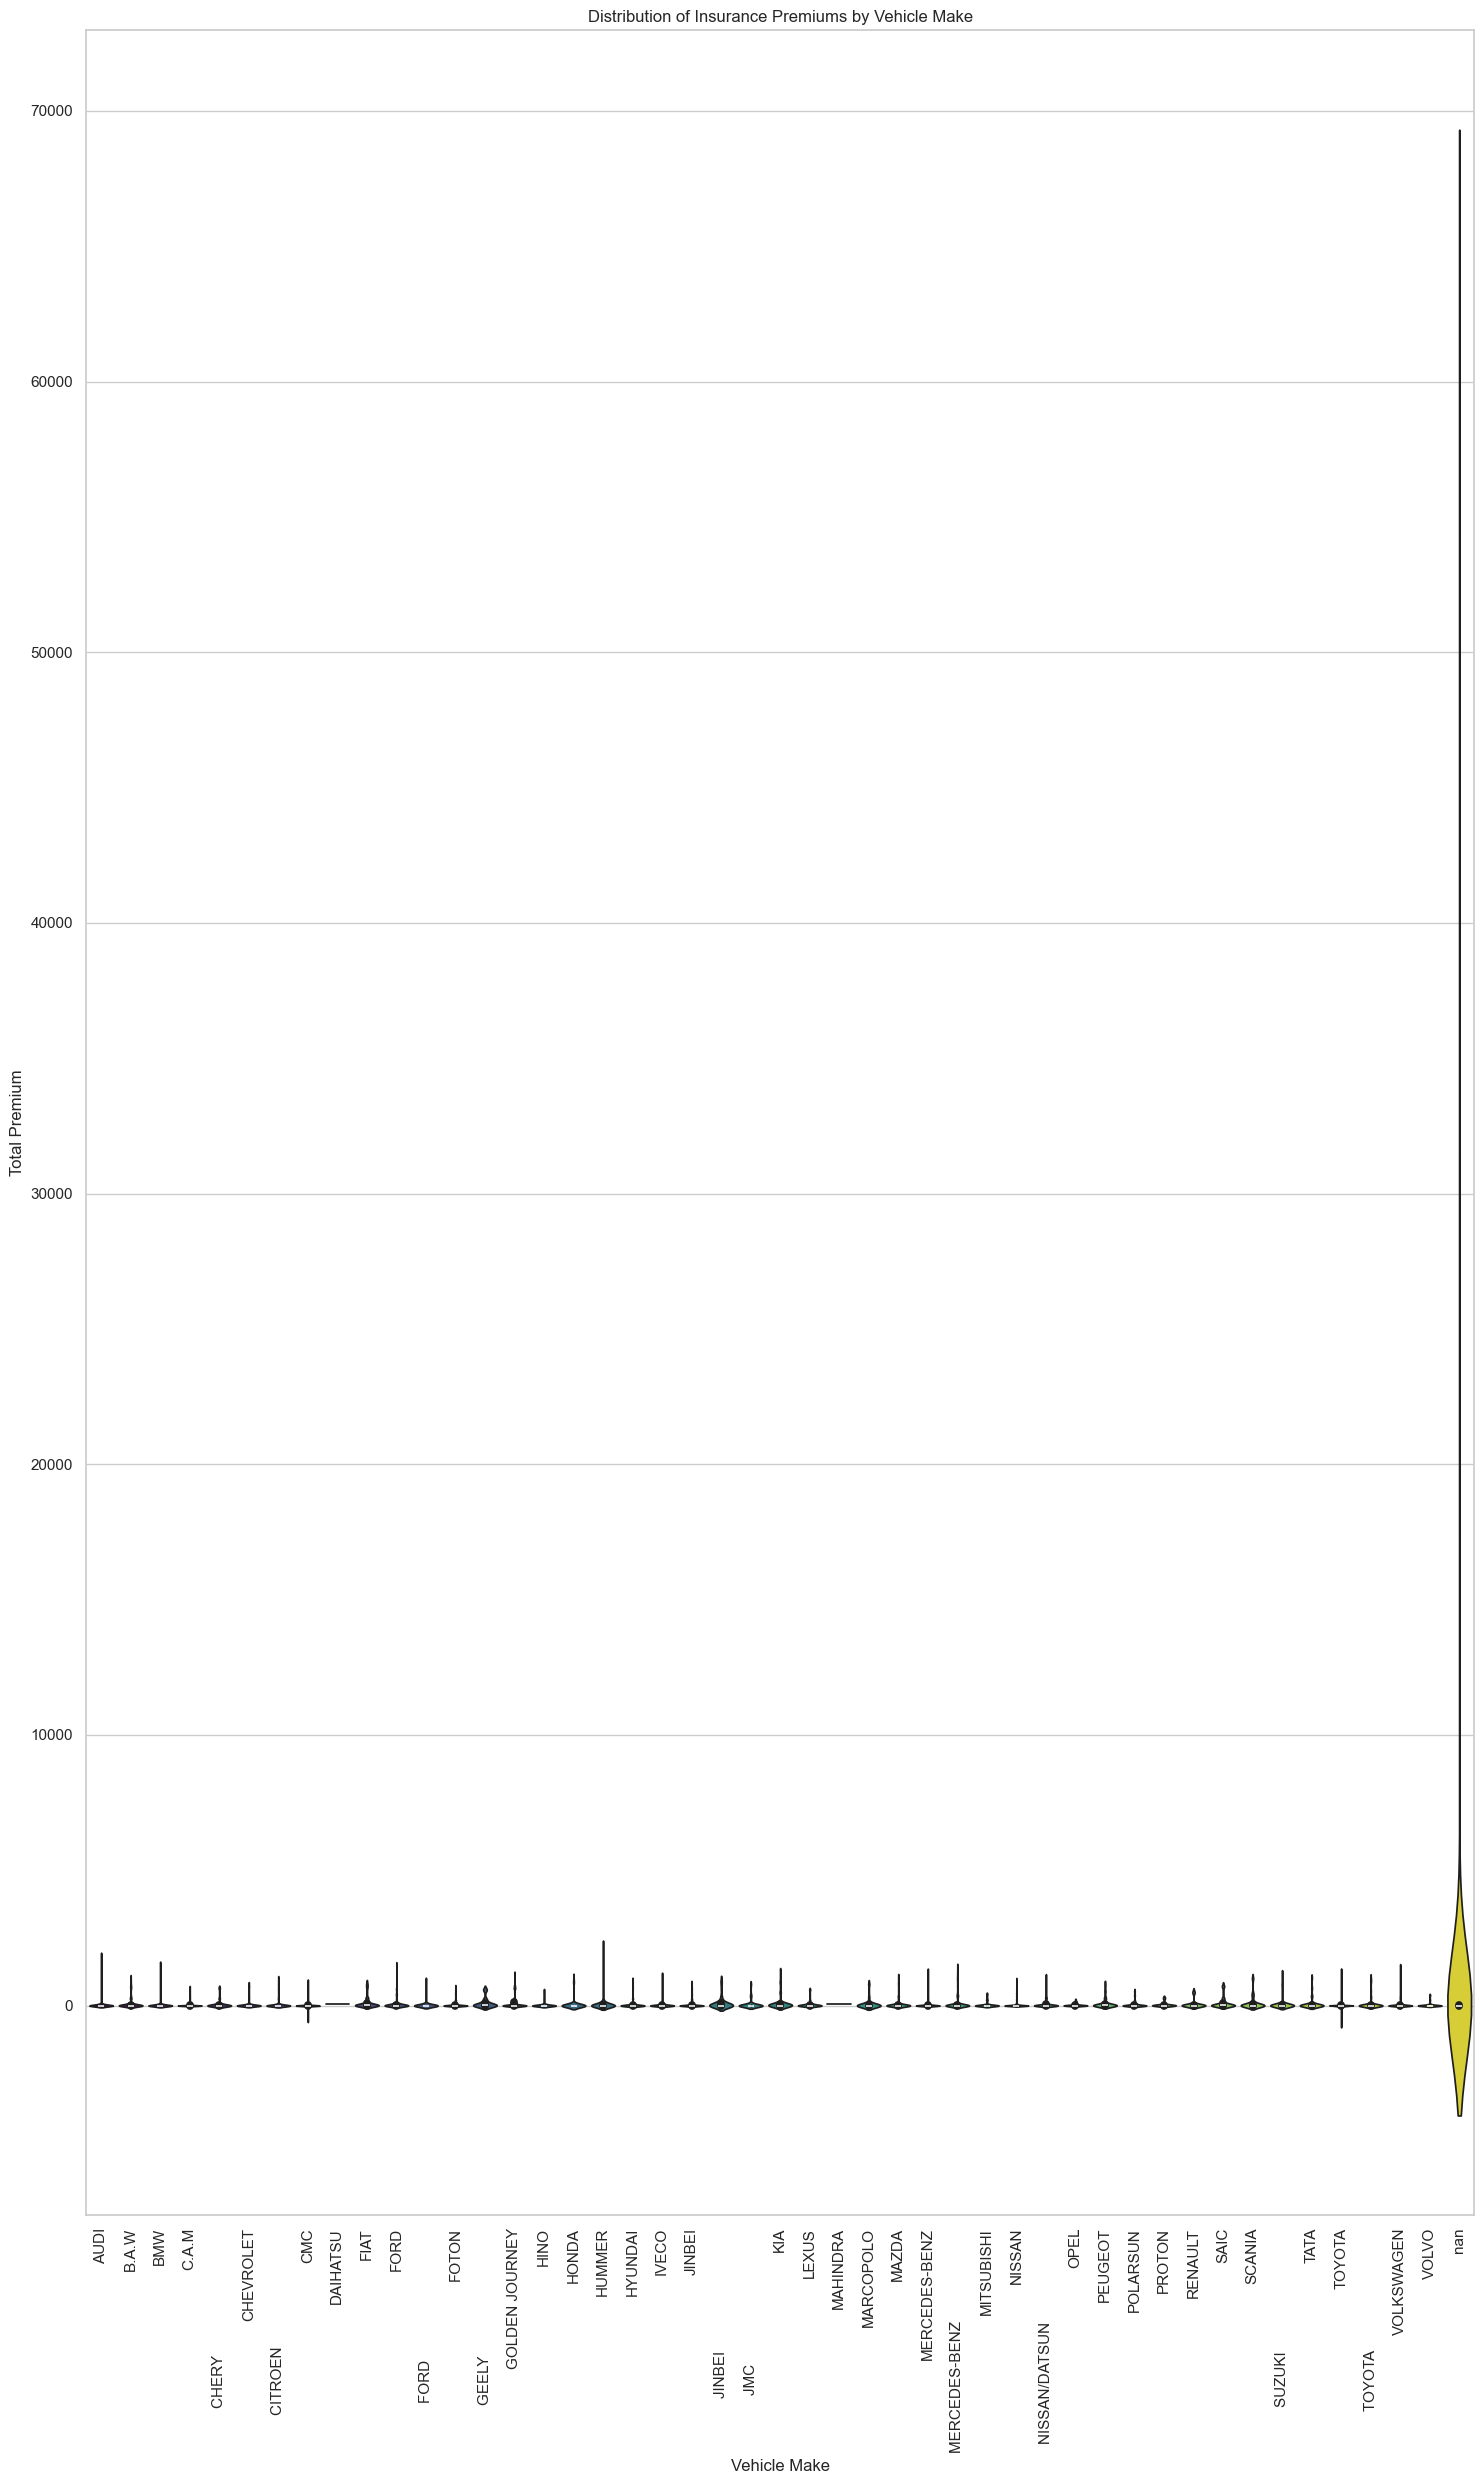

In [39]:
# Plot violin distribution of TotalPremium by Vehicle Make
plot_violin_distribution(data, x_column='make', y_column='TotalPremium', hue_column='make')

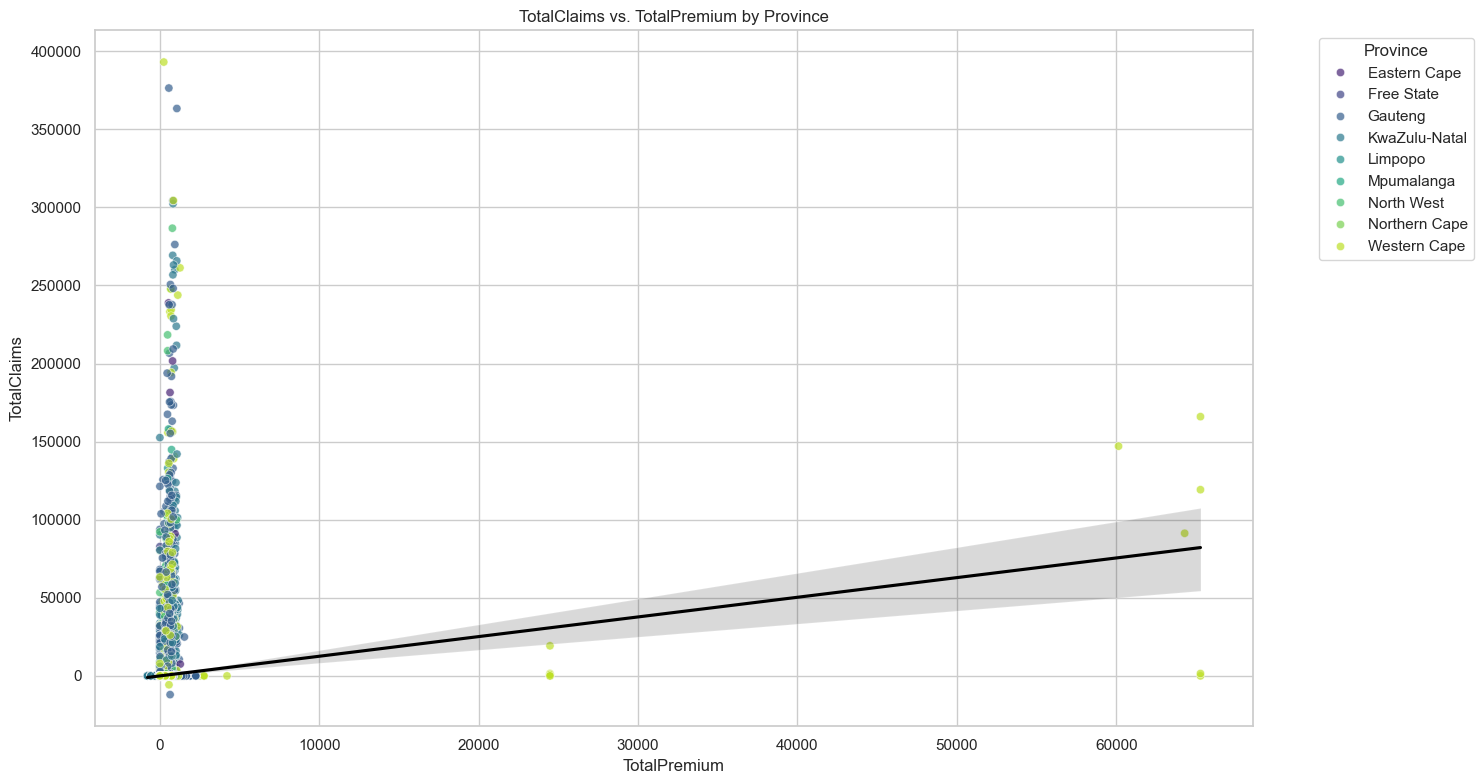

In [40]:

# Plot scatter plot with regression line
plot_scatter_with_regression(data, x_column='TotalPremium', y_column='TotalClaims', hue_column='Province')

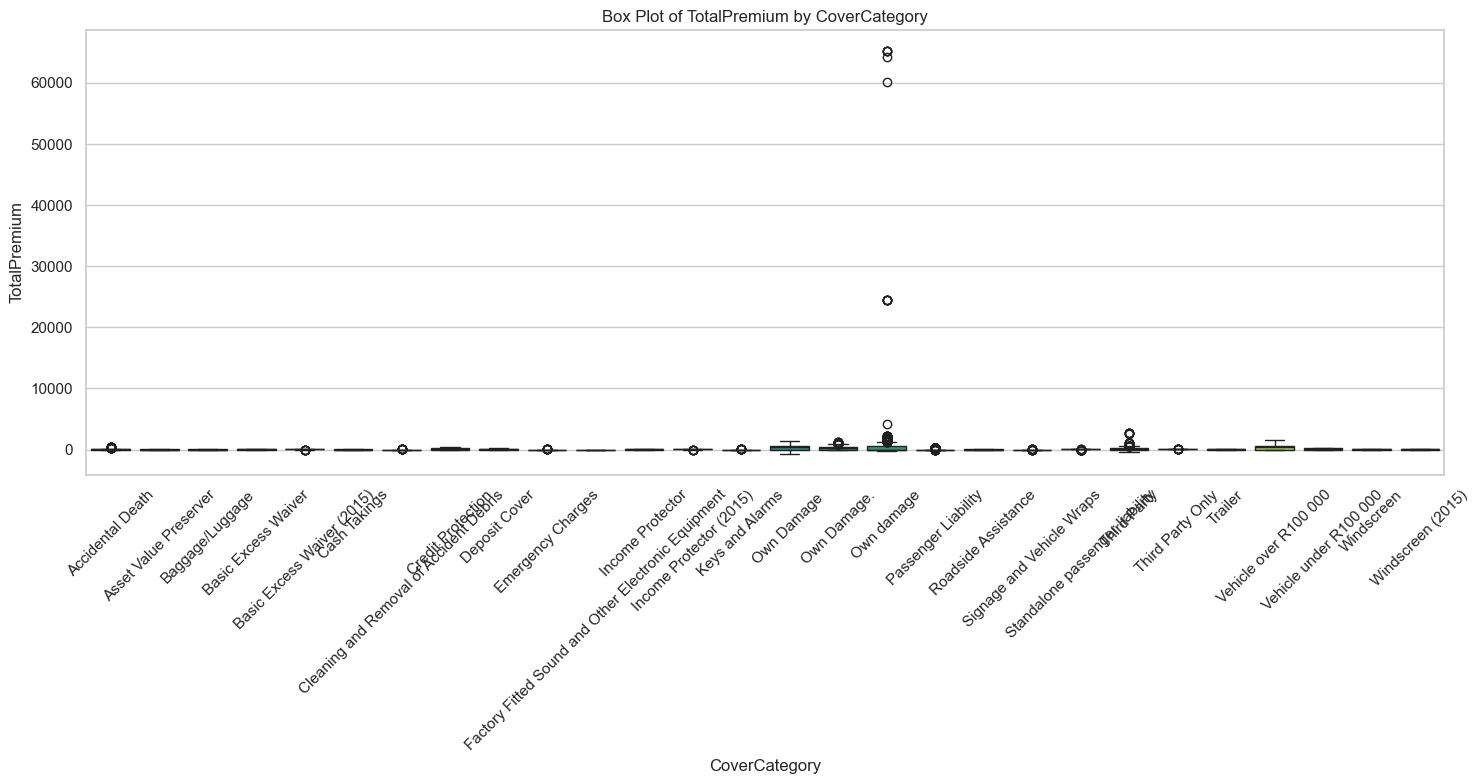

In [41]:
# Plot box plot of Premiums by Cover Category
plot_boxplot_by_category(data, x_column='CoverCategory', y_column='TotalPremium', hue_column='CoverCategory')